In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import sys
sys.path.append('/content/drive/My Drive/Dataset/')

In [3]:
drive.mount("/content/drive/", force_remount=True)

Mounted at /content/drive/


In [0]:
!ls '/content/drive/My Drive/Dataset/'

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Model, load_model
import pandas as pd
import numpy as np
import Preprocess
import Evaluate
from keras import backend as K
np.random.seed(4)
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [0]:
def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))


def load_RS_model(model_name, indicator):
    if indicator == "normal":
        model=load_model(model_name, custom_objects={'root_mean_squared_error': root_mean_squared_error})
        print("Loaded model from disk successfully")
    # if indicator == "json":
    #     json_file = open(model_name, 'r')
    #     loaded_model_json = json_file.read()
    #     json_file.close()
    #     model = model_from_json(loaded_model_json)
    #     # load weights into new model
    #     model.load_weights("model.h5")
    #     print("Loaded model from disk successfully")
    return model

def getUserItemEmbeddings(Dataset, uid,index):
    userList = Dataset.loc[:, Dataset.columns.str.contains('u')].copy()
    userList.drop(columns='userId', inplace=True)
    uniqueUserList = userList.loc[index]
    unseenItems=Dataset.loc[Dataset['userId']!=uid, :].sample(n=99, replace=False, random_state=5)
    unseenItems=unseenItems.append(Dataset.loc[index])
    movieList=unseenItems.loc[:, unseenItems.columns.str.contains('i')].copy()
    uniqueMovieList = movieList.drop_duplicates('itemId', keep='first')
    return [uniqueUserList, uniqueMovieList]

    

In [0]:
def minNitemUserSet(Dataset):
  #print(Dataset.head())
  DatasetSubset= Dataset.groupby('userId').agg(totalItem=pd.NamedAgg(column='itemId', aggfunc='count'))
  mask = (DatasetSubset['totalItem']>=10)
  DatasetSubsetAbove10=DatasetSubset[mask]
  final=Dataset[Dataset['userId'].isin(DatasetSubsetAbove10.index)]
  return final
  

In [0]:
def data(ratingDatsetLoc):
    ratings = pd.read_csv(ratingDatsetLoc, index_col=False, usecols=['userId', 'itemId', 'rating','timestamp'])  # index_col=False  ,'timestamp'
    # ratings.drop(columns='timestamp', inplace=True)
    EmbedFile = pd.read_csv("/content/drive/My Drive/Dataset/emb_files/movielens_100k_256.emd", skiprows=1, header=None, sep=' ')
    userEmbedding, movieEmbedding = Preprocess.processEmbeddingData(EmbedFile)
    Rating_Dataset = Preprocess.ratingsReconstruct(userEmbedding, movieEmbedding, ratings)
    print(Rating_Dataset.head())
    return Rating_Dataset


In [0]:
def get_Train_and_Test_Dataset(Rating_Dataset):
    Label = Preprocess.getTarget(Rating_Dataset)
    ''' random split '''
    secondSetofDataset,Label, Time_based_leave_n_outTestSet=Preprocess.timeSplit(Rating_Dataset,1)
    sampleDataTrain, sampleDataTest, labelTrain, labelTest = Preprocess.splitDataset(secondSetofDataset, Label, 0.2)
    # sampleDataTrain, sampleDataTest, labelTrain, labelTest = Preprocess.splitDataset(Rating_Dataset, Label, 0.2)

    ''' Leave-n-out split'''
    # secondSetofDataset,Label, Time_based_leave_n_outTestSet = Preprocess.leave_n_outSplit(Rating_Dataset,1)
    # sampleDataTrain, sampleDataTest, labelTrain, labelTest = Preprocess.splitDataset(secondSetofDataset, Label, 0.2)


    userTrain, itemTrain = Preprocess.seperateEntities(sampleDataTrain)
    userTest, itemTest = Preprocess.seperateEntities(sampleDataTest)

    return (userTrain, itemTrain, labelTrain, userTest, itemTest, labelTest,Time_based_leave_n_outTestSet.iloc[:,0:4])
    # return (userTrain, itemTrain, labelTrain, userTest, itemTest, labelTest)



In [0]:
RS_model=load_RS_model("/content/drive/My Drive/Dataset/2nd_trained_model/rs_100k_ml_model.h5","normal")


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Loaded model from disk successfully


In [0]:
loc_movielens_100k = "/content/drive/My Drive/Dataset/movielens_100k.csv"
data_with_Embedding = data(loc_movielens_100k)
userTrain, itemTrain, labelTrain, userTest, itemTest, labelTest,Time_based_leave_n_outTestSet = get_Train_and_Test_Dataset(data_with_Embedding)
# userTrain, itemTrain, labelTrain, userTest, itemTest, labelTest= get_Train_and_Test_Dataset(data_with_Embedding)

print(data_with_Embedding.describe())

int64
int64
int64
int64
   userId  itemId  rating   timestamp  ...     253_i    254_i     255_i     256_i
0       1       1     4.0   964982703  ...  0.540746 -0.49393  1.407914 -2.115184
1       5       1     4.0   847434962  ...  0.540746 -0.49393  1.407914 -2.115184
2       7       1     4.5  1106635946  ...  0.540746 -0.49393  1.407914 -2.115184
3      15       1     2.5  1510577970  ...  0.540746 -0.49393  1.407914 -2.115184
4      17       1     4.5  1305696483  ...  0.540746 -0.49393  1.407914 -2.115184

[5 rows x 516 columns]
              userId         itemId  ...          255_i          256_i
count  100836.000000  100836.000000  ...  100836.000000  100836.000000
mean      326.127564   19435.295718  ...       0.252442      -0.542338
std       182.618491   35530.987199  ...       0.926258       1.056123
min         1.000000       1.000000  ...      -3.186757      -3.707690
25%       177.000000    1199.000000  ...      -0.286693      -1.195824
50%       325.000000    2991.00000

In [0]:
Evaluate.testModel(RS_model,labelTest, userTest, itemTest)


Mean squared error (MSE)  0.5842866057234001
Mean absolute error (MAE)  0.5795316269306631
Root mean squared error (RMSE) 0.7643864243453046


In [0]:
TestSet=Time_based_leave_n_outTestSet  #.sample(n=30, replace=False, random_state=30)
print(TestSet.head())
print(data_with_Embedding.head())
print(data_with_Embedding.describe())


       userId  itemId  rating   timestamp
12394       1    2492     4.0   965719662
17605       2   80489     4.5  1445715340
18601       3    2424     0.5  1306464293
24713       4    4246     4.0  1007574542
19335       5     247     5.0   847435337
   userId  itemId  rating   timestamp  ...     253_i    254_i     255_i     256_i
0       1       1     4.0   964982703  ...  0.540746 -0.49393  1.407914 -2.115184
1       5       1     4.0   847434962  ...  0.540746 -0.49393  1.407914 -2.115184
2       7       1     4.5  1106635946  ...  0.540746 -0.49393  1.407914 -2.115184
3      15       1     2.5  1510577970  ...  0.540746 -0.49393  1.407914 -2.115184
4      17       1     4.5  1305696483  ...  0.540746 -0.49393  1.407914 -2.115184

[5 rows x 516 columns]
              userId         itemId  ...          255_i          256_i
count  100836.000000  100836.000000  ...  100836.000000  100836.000000
mean      326.127564   19435.295718  ...       0.252442      -0.542338
std       182.61849

In [0]:
def topNpredictions(uniqueUserList,uniqueMovieList, N, Rmodel):
    uEmbed=np.asarray(uniqueUserList)
    prediction=pd.DataFrame(columns=['itemId','predicted_rating'])
    count=0
    for row in uniqueMovieList.itertuples():
        count+=1
        prediction.loc[count,'itemId']=mid=row[1]
        mEmbed=np.asarray(row[3:259])
        prediction.loc[count, 'predicted_rating']=np.round(Rmodel.predict([uEmbed.reshape(256,1).T, mEmbed.reshape(256,1).T]),1)
    prediction.sort_values(by='predicted_rating',ascending=False,inplace=True)
    topPredicted = prediction.head(n=N)
    print(topPredicted.shape)
    return (topPredicted)

def minNitemUserSet(Dataset):
    #print(Dataset.head())
    DatasetSubset= Dataset.groupby('userId').agg(totalItem=pd.NamedAgg(column='itemId', aggfunc='count'))
    mask = (DatasetSubset['totalItem']>=10)
    DatasetSubsetAbove10=DatasetSubset[mask]
    final=Dataset[Dataset['userId'].isin(DatasetSubsetAbove10.index)]
    return final



def getUserItemEmbeddings(Dataset, uid,index):
    userList = Dataset.loc[:, Dataset.columns.str.contains('u')].copy()
    userList.drop(columns='userId', inplace=True)
    uniqueUserList = userList.loc[index]                                    #Get embedding of target user

    unseenItemsAll=Dataset.loc[Dataset['userId']!=uid, :]    #, :
    unseenItems=unseenItemsAll.sample(n=99, replace=False)
    unseenItems=unseenItems.append(Dataset.loc[index])

    movieList=unseenItems.loc[:, unseenItems.columns.str.contains('i')].copy()

    uniqueMovieList = movieList.drop_duplicates('itemId', keep='last')
    # uniqueMovieList=movieList
    return [uniqueUserList, uniqueMovieList]

def getUserItemEmbeddingsE(Dataset, uid,index):
    userList = Dataset.loc[:, Dataset.columns.str.contains('u')].copy()
    userList.drop(columns='userId', inplace=True)
    uniqueUserList = userList.loc[index]                                    #Get embedding of target user

    unseenItemsAll=Dataset.loc[Dataset['userId']!=uid]    #, :
    
    unseenItemsUniq = unseenItemsAll.drop_duplicates('itemId', keep='last')
    unseenItems=unseenItemsUniq.sample(n=99, replace=False, random_state=25)
    df=unseenItems.sample(n=99, replace=False)
    unseenItems=unseenItems.append(Dataset.loc[index])

    movieList=unseenItems.loc[:, unseenItems.columns.str.contains('i')].copy()

    # uniqueMovieList = movieList.drop_duplicates('itemId', keep='last')
    uniqueMovieList=movieList
    # print('uniq',uniqueMovieList.nunique())
    # print(uniqueMovieList.describe())

    return [uniqueUserList, uniqueMovieList]

def oneOutof100_hitRate(leftoutpredictions, Dataset, N, Rmodel):
    hits = 0
    total = 0




def hitRate(leftoutpredictions, Dataset, N, Rmodel):
    hits = 0
    total = 0
    
    Dataset=minNitemUserSet(Dataset)                                                                    # Get users who have rated a minimum number N of items

    leftoutWithMinNItemUsers=leftoutpredictions[leftoutpredictions['userId'].isin(Dataset.userId)]      # Get embedding of leftout users
    # print(leftoutWithMinNItemUsers.head())
    
    NoOfUsers=leftoutWithMinNItemUsers['userId'].count()
    sample_size=1000
    if sample_size>NoOfUsers:
      sample_size=NoOfUsers

    sampleleftoutpredictions=leftoutWithMinNItemUsers.sample(n=sample_size,replace=False, random_state=25)      # Get subset of users who have rated a minimum number N of items
    for leftout in sampleleftoutpredictions.itertuples():
        uid = leftout[1]
        leftoutmovieid = leftout[2]
        userEmbedding, movieEmbedding = getUserItemEmbeddingsE(Dataset,uid,leftout[0])
        # print(userEmbedding.head())
        # print(movieEmbedding.describe())

        hit = False
        #getRandom_k_prediction(uid,testSet, 10, model)
        topNpredicted=topNpredictions(userEmbedding, movieEmbedding,N, Rmodel)                         # Get topN rated items 
        # print(topNpredicted.shape)
        # for index, row in topNpredicted.iterrows():
        #     if (row['itemId'] ==leftoutmovieid):
        # print(leftoutmovieid)
        #val=topNpredicted[topNpredicted['itemId']==leftoutmovieid]
        if leftoutmovieid in topNpredicted['itemId']:
            hits +=1 
      
        total += 1
        print(hits / total)
    return hits / total


In [0]:
HR_at_N = hitRate(TestSet, data_with_Embedding,10,RS_model)
print(HR_at_N)

# movie_genre_counts=pd.read_csv("/Users/ygoswell/Desktop/movie_counts_and_genre.csv")
# print(movie_genre_counts.describe())
# 0.001996

(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10, 2)
0.0
(10,

In [0]:
def relnrec(row):     
    count=0
    if row[2]>=6.5 and row[1]>6.5:
       count+=1
    return count

def rec(row):
    count=0
    if row>=6.5:
        count+= 1
    return 0

def p_coverage(Ip, I):
  prediction_coverage=Ip/I
  return prediction_coverage


def prediction_coverage(top10predictedSet,predicted_superset ):

  df=predicted_superset[~predicted_superset['itemId'].isin(top10predictedSet)]
  #mask=top10predictedSet.userId.isin(predicted_superset.userId)

  predicted_superset = predicted_superset.append(df)
  # print(predicted_superset.shape)
  return predicted_superset


def Precision1(mainDataset, model, sample_size, top):
    '''
    A relevant item is an item that the user actually rated >=3.5
    A recommended item is an item recommended by the algorithm with a predicted rating rating >=3.5
    Recall@k = (# of recommended items @k that are relevant) / (total # of relevant items)
    Precision@k = (# of recommended items @k that are relevant) / (# of recommended items @k)
    '''
    I = mainDataset['itemId'].nunique()
    
    Dataset=minNitemUserSet(mainDataset)                                                   # Get only users with N or more ratd items
    userList = Dataset.loc[:, Dataset.columns.str.contains('u')].copy()                    # Get all user embedding columns and user id
    uniqueUsers = userList.drop_duplicates('userId', keep='first')                         # remove duplicates
    movieList = Dataset.loc[:, Dataset.columns.str.contains('i')].copy()                   # Get all movie embedding columns and movie id
    uniqueMovie = movieList.drop_duplicates('itemId', keep='first')                        # remove duplicates
    mEmbed = np.asarray(uniqueMovie.iloc[:,2:259]) #[:,3:259]
    #predictions = pd.DataFrame(columns=['itemId', 'predicted_rating', 'actual_rating'])   # creates table to hold predicted items

    precision = 0
    recall=0
    N=uniqueUsers['userId'].count()
    if sample_size>N:
      sample_size=N
    sampleUniqueUsers = uniqueUsers.sample(n=sample_size, replace=False, random_state=5)    # samples the user set
    users_precision = pd.DataFrame(columns=['userId', 'precision_at_10', 'recall_at_10'])   # create table to hold precision at 10 for each user
    lens = uniqueMovie.shape[0]
    count = 0

    predictedMoviesSet=pd.DataFrame(columns=['itemId'])
    
    predictedsubList=[]
    predictedList=[]

    print(users_precision.head())
    for row in sampleUniqueUsers.itertuples():                                              # loop through each user
        uid = row[1]                                                                        # Get user id
        mask=(Dataset['userId']==uid) & (Dataset['rating']>=6.5)                            # Get the sum of item ratings >=3.5 for each user  
        sumRelevant=Dataset[mask]
        total_relevant=sumRelevant['rating'].count()
        uEmbed = np.expand_dims(np.asarray(row[2:258]), axis=0)                             # Get the embedding vector of user
        users_precision.at[count, 'userId'] = uid
        print(users_precision.head())
        uEmbed_repeated = np.repeat(uEmbed, repeats=lens, axis=0)
        uniqueMovieId=uniqueMovie.iloc[:,0:1]
        uniqueMovieId['predicted'] = np.round(model.predict([uEmbed_repeated, mEmbed]))
        uniqueMovieId.sort_values(by='predicted', ascending=False, inplace=True)
        
        predictedMovies=uniqueMovieId.loc[uniqueMovieId['predicted']>=6.5].itemId               # Gathers the set of all uniquely recommended overall by the system

        b=[]
        b=list(predictedMovies)
        a=[]
        # c=[]
        # d=[]
        if len(predictedsubList)==0:
            predictedList=b
            predictedsubList=b
        else:
            predictedList=b
            # c=list(set(b)-set(a))
            c = [item for item in predictedList if item not in predictedsubList]
            predictedsubList.extend(c)

        # predictedList = predictedsubList        
        # predictedMoviesSet=prediction_coverage(predictedMovies,predictedMoviesSet)    
        

        
        topPredicted10=uniqueMovieId.head(top).copy()                                        # get top 10 recommendation
        actual_rating = []
        for item in topPredicted10.itertuples():                                            # get actual rating for topN item where available
            i=item[0]
            data = Dataset.query('itemId==@item[1] and userId==@uid')
            if data.empty==False:
                actual_rating.append(data.rating.values)
            else:
                actual_rating.append(np.nan)
        topPredicted10['actual_rating']=actual_rating
        print(topPredicted10.head(10))
        
        relNrec = np.sum(topPredicted10.apply(relnrec, axis=1))  
        maks = topPredicted10['predicted']>6.5
        recommended = topPredicted10[maks].predicted.count()
        # recommended = np.sum(topPredicted10['predicted'].apply(rec)) 
        # print('relNrec',relNrec)
        # print('recc',recommended)

        if recommended>0:
          users_precision.at[count, 'precision_at_10'] = relNrec / recommended                              # store value of precision for user
          print("up")
          print(users_precision.head())
        else:
          users_precision.at[count, 'precision_at_10'] = 1
        if total_relevant>0:
            users_precision.at[count, 'recall_at_10'] = relNrec / total_relevant                  # store value of recall for user
        else:
            total_relevant=0
            users_precision.at[count, 'recall_at_10'] = 1
        
        count=count+1
        
        
    avg_precision=users_precision['precision_at_10'].sum()/sample_size
    avg_recall=users_precision['recall_at_10'].sum()/sample_size
    
    print("Average Precision",avg_precision)
    print("Average Recall",avg_recall)
    Ip=len(predictedsubList)
    print("Precision Coverage",p_coverage(Ip,I))
    


In [0]:
print(TestSet['userId'].nunique())

In [0]:
musical_Instruments_rating_200k.csv
musical_instrument_rating_200k.emb
rs_amusIns_model.h5

In [0]:
Precision1(data_with_Embedding,RS_model,1000,5)

In [0]:
Precision1(data_with_Embedding,RS_model,1000,10)

In [0]:
Precision1(data_with_Embedding,RS_model,1000,15)


In [0]:
Precision1(data_with_Embedding,RS_model,1000,20)


In [0]:
Precision1(data_with_Embedding,RS_model,1000,30)


In [0]:
Precision1(data_with_Embedding,RS_model,1000,40)


In [0]:
Precision1(data_with_Embedding,RS_model,1000,50)

In [0]:
HR_at_N = hitRate(TestSet, data_with_Embedding,10,RS_model)
print(HR_at_N)

In [0]:
HR_at_N = hitRate(TestSet, data_with_Embedding,15,RS_model)
print(HR_at_N)

In [0]:
HR_at_N = hitRate(TestSet, data_with_Embedding,20,RS_model)
print(HR_at_N)

In [0]:
HR_at_N = hitRate(TestSet, data_with_Embedding,30,RS_model)
print(HR_at_N)

In [0]:
HR_at_N = hitRate(TestSet, data_with_Embedding,40,RS_model)
print(HR_at_N)

In [0]:
HR_at_N = hitRate(TestSet, data_with_Embedding,50,RS_model)
print(HR_at_N)

In [0]:
Precision1(data_with_Embedding,RS_model,1000,10)


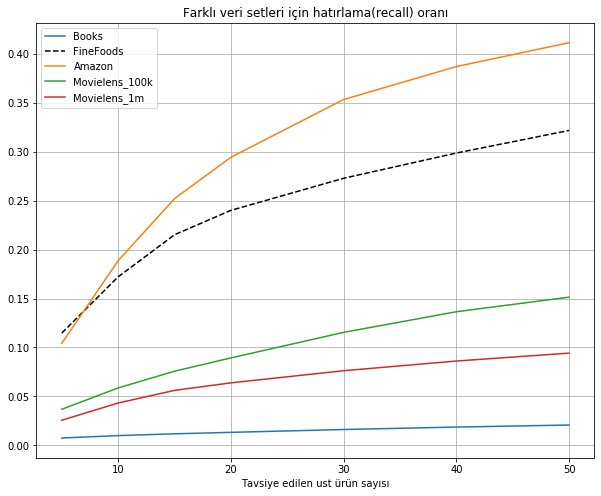

In [0]:
#Draw Recall

topN=[5,10,15,20,30,40,50]
Books=[0.0074,0.0099,0.0117,0.0132,0.0161,0.0186,0.0207]
Fine_foods=[0.1147,0.1722,0.2152,0.2401,0.2729,0.2987,0.3218]
Amazon=[0.1042,0.1887,0.2521,0.2944,0.3534,0.3871,0.4115]
ML_100k=[0.0368,0.0586,0.0757,0.0893,0.1154,0.1365,0.1514 ]
ML_1m=[0.0256, 0.0432,0.0561, 0.0638, 0.0762,0.0861,0.0942]

fig, ax = plt.subplots(1, figsize=(10, 8))

ax.plot(topN,Books, label='Books')
ax.plot(topN,Fine_foods, label='FineFoods', color='black' , ls='--')
ax.plot(topN,Amazon, label='Amazon')
ax.plot(topN,ML_100k,label='Movielens_100k')
ax.plot(topN,ML_1m, label='Movielens_1m')

ax.legend()
ax.set_xlabel('Tavsiye edilen ust ürün sayısı')
ax.set_title('Farklı veri setleri için hatırlama(recall) oranı')
ax.grid(True)
plt.show()

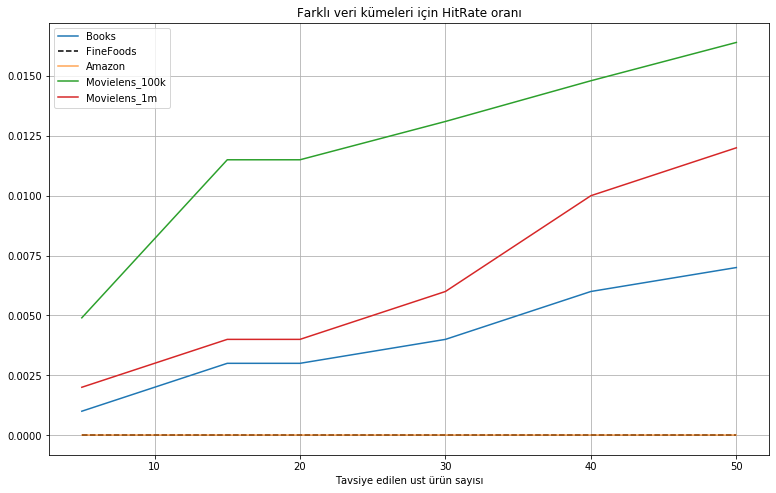

In [0]:
#Draw HitRate

topN=[5,10,15,20,30,40,50]
Books=[0.001,0.002,0.003,0.003,0.004,0.006,0.007]
Fine_foods=[0.0,0.0,0.0,0.0,0.0,0.0,0.0]
Amazon=[0.0,0.0,0.0,0.0,0.0,0.0,0.0]
ML_100k=[0.0049,0.0082,0.0115,0.0115,0.0131,0.0148,0.0164]
ML_1m=[0.002, 0.003,0.004, 0.004, 0.006,0.01,0.012]

#fig = plt.figure(figsize=(10, 7))
fig, ax = plt.subplots(1, figsize=(10, 6))
ax = fig.add_axes([0,0,1,1])

ax.plot(topN,Books, label='Books')
ax.plot(topN,Fine_foods, label='FineFoods', color='black', ls='--')
ax.plot(topN,Amazon, label='Amazon', alpha=0.7)
ax.plot(topN,ML_100k,label='Movielens_100k')
ax.plot(topN,ML_1m, label='Movielens_1m',)

ax.legend()

ax.set_xlabel('Tavsiye edilen ust ürün sayısı')
ax.set_title('Farklı veri kümeleri için HitRate oranı')
ax.grid(True)
plt.show()


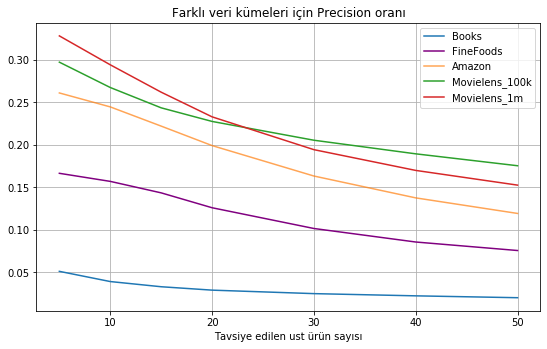

In [0]:
#Draw Precision

topN=[5,10,15,20,30,40,50]
Books=[0.051,0.0390,0.0329,0.0289,0.0248,0.0222,0.020]
Fine_foods=[0.1663,0.1568,0.1433,0.1258,0.1014,0.0855,0.0755]
Amazon=[0.2608,0.2444,0.2218,0.1989,0.1631,0.1374,0.1191]
ML_100k=[0.297,0.2672,0.2433,0.2273,0.2052,0.1892,0.1752]
ML_1m=[0.3279, 0.2939,0.2617, 0.2327, 0.1941,0.1697,0.1524]

#fig = plt.figure(figsize=(10, 7))
fig, ax = plt.subplots(1, figsize=(7, 4))
ax = fig.add_axes([0,0,1,1])

ax.plot(topN,Books, label='Books')
ax.plot(topN,Fine_foods, label='FineFoods', color='purple')
ax.plot(topN,Amazon, label='Amazon', alpha=0.7)
ax.plot(topN,ML_100k,label='Movielens_100k')
ax.plot(topN,ML_1m, label='Movielens_1m',)

ax.legend()

ax.set_xlabel('Tavsiye edilen ust ürün sayısı')
ax.set_title('Farklı veri kümeleri için Precision oranı')
ax.grid(True)
plt.show()


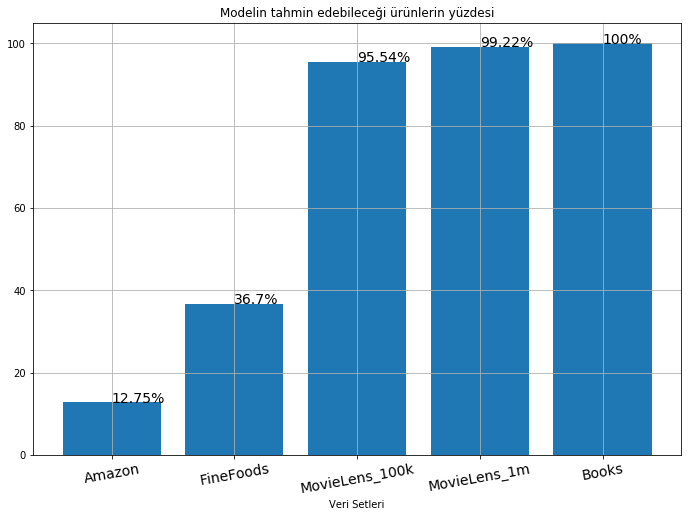

In [0]:
#Draw Predictive coverage

Dataset=['Amazon','FineFoods','MovieLens_100k','MovieLens_1m','Books']
precision=[12.75,36.70,95.54,99.22,100]

fig = plt.figure(figsize=(9, 6))
ax = fig.add_axes([0,0,1,1])

ax.bar(Dataset,precision)
plt.xticks(Dataset, fontsize=14,rotation=10)
plt.grid(True)

for a,b in zip(Dataset, precision,):
    plt.text(a, b, str(b)+'%', fontsize=14)

plt.xlabel('Veri Setleri')
plt.title('Modelin tahmin edebileceği ürünlerin yüzdesi')
plt.show()

# y_pos=np.arange(len(Dataset))
# plt.bar(y_pos, precision, align='center', alpha=0.5)
# plt.xticks(y_pos, Dataset, rotation=30)
# plt.ylabel('Percentage Predicted Item Coverage')
# plt.title('Percentage of items the model is able to predict')
# plt.grid(True)
# plt.show()




   Unnamed: 0  userId  itemId  rating  timestamp
0           0       1       1     4.0  964982703
1           1       1       3     4.0  964981247
2           2       1       6     4.0  964982224
3           3       1      47     5.0  964983815
4           4       1      50     5.0  964982931
          Unnamed: 0         userId         itemId         rating     timestamp
count  100836.000000  100836.000000  100836.000000  100836.000000  1.008360e+05
mean    50417.500000     326.127564   19435.295718       3.501557  1.205946e+09
std     29108.990209     182.618491   35530.987199       1.042529  2.162610e+08
min         0.000000       1.000000       1.000000       0.500000  8.281246e+08
25%     25208.750000     177.000000    1199.000000       3.000000  1.019124e+09
50%     50417.500000     325.000000    2991.000000       3.500000  1.186087e+09
75%     75626.250000     477.000000    8122.000000       4.000000  1.435994e+09
max    100835.000000     610.000000  193609.000000       5.000000 

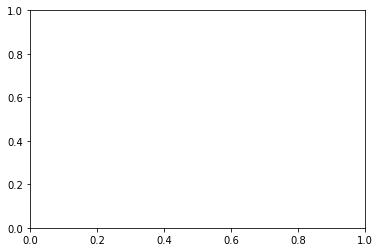

In [5]:

ratings = pd.read_csv("/content/drive/My Drive/Dataset/movielens_100k.csv")
print(ratings.head())
print(ratings.describe())

ratings['ratingCount'] = ratings.groupby('userId')['itemId'].transform("count")

userList = ratings['userId'].unique()
ratingCount = pd.DataFrame(userList)
ratingCount.columns = ['userId']

countRating=ratings.groupby('userId')['itemId'].count()
countMovie=ratings.groupby('itemId')['userId'].count()

ratings['movieRatingSum'] = ratings.groupby('itemId')['rating'].transform("count")
fig, ax = plt.subplots()

x = ratings['userId'].unique()
y=countRating
y0=countMovie
x1 = ratings['itemId']
y1 = ratings['movieRatingSum']
print(len(x))
print(len(y))
print(y.max())


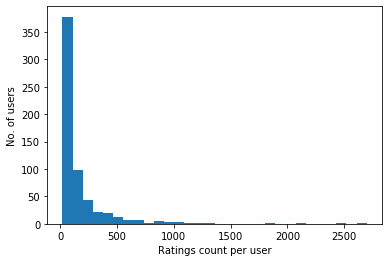

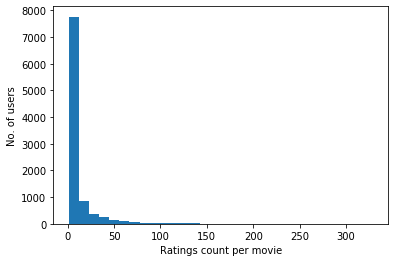

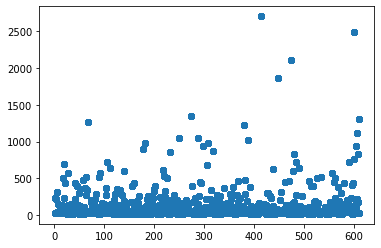

In [6]:
#plt.plot(x,y)
#plt.plot()
plt.hist(y, bins=30)
plt.xlabel('Kullanıcı başına derecelendirme dağılımı')
plt.ylabel('No. of users')
plt.show()

plt.hist(y0, bins=30)
plt.xlabel('Oge başına derecelendirme dağılımı')
plt.ylabel('No. of users')
plt.show()

a=ratings['userId']
b=ratings['ratingCount']
plt.scatter(a,b)
plt.show()

